In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
dataset = pd.read_csv('loan_prediction.csv')
df = pd.DataFrame(dataset)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
len(df)

614

In [7]:
df = df.drop('Loan_ID', axis = 1)


Converting the Loan status column values into binary form


In [8]:
df["Loan_Status"] = (df["Loan_Status"] == "Y").astype(int)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


As there are some missing values in the columns, we fill the missing values of categorical data with their mode

In [10]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


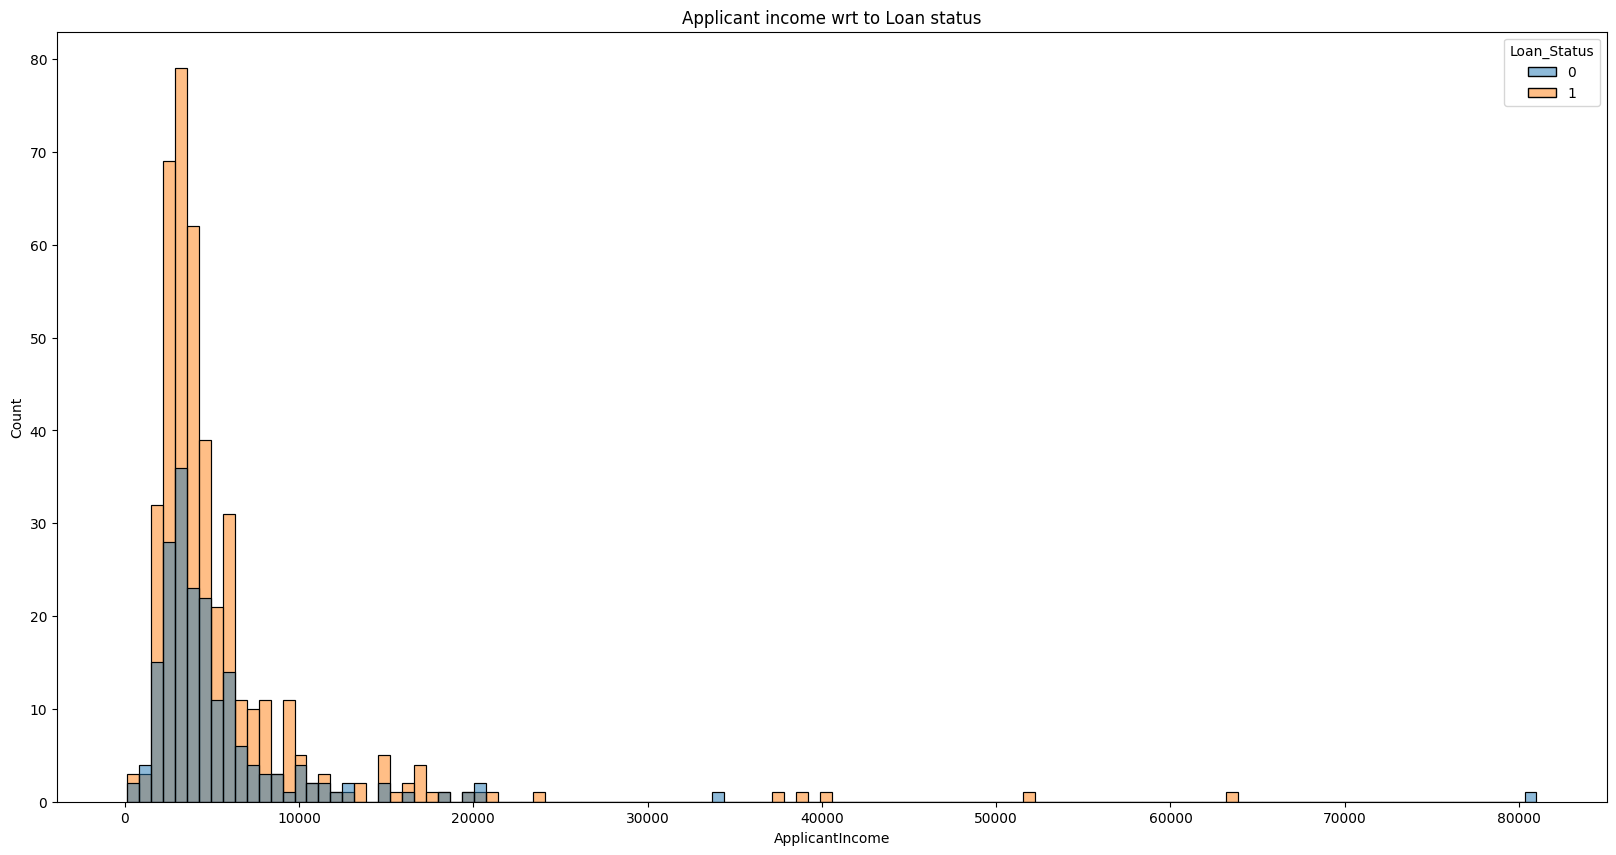

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Applicant income wrt to Loan status")
sns.histplot(x="ApplicantIncome", hue="Loan_Status", data=df)
plt.show()

This contains outliers, hence removing them

In [14]:
Q1 = df["ApplicantIncome"].quantile(0.25)
Q3 = df["ApplicantIncome"].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

df = df[(df["ApplicantIncome"] >= lower_bound) & (df["ApplicantIncome"] <= upper_bound)]


In [15]:
import plotly.express as px

loan_status_count = df["Loan_Status"].value_counts()
fig_loan_status = px.pie(loan_status_count,
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

Gender distribution

In [16]:
gender_count = df["Gender"].value_counts()
fig_gender = px.bar(gender_count,
                    x=gender_count.index,
                    y=gender_count.values,
                    title='Gender Distribution')
fig_gender.show()

In [17]:
married_count = dataset["Married"].value_counts()
fig_married = px.bar(married_count,
                     x=married_count.index,
                     y=married_count.values,
                     title='Marital Status Distribution')
fig_married.show()

In [18]:
education_count = dataset["Education"].value_counts()
fig_education = px.bar(education_count,
                       x=education_count.index,
                       y=education_count.values,
                       title='Education Distribution')
fig_education.show()

In [19]:
fig_applicant_income = px.histogram(dataset, x="ApplicantIncome",
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

In [20]:
fig_income = px.box(dataset, x="Loan_Status",
                    y="ApplicantIncome",
                    color="Loan_Status",
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [21]:
fig_credit_history = px.histogram(dataset, x="Credit_History", color="Loan_Status",
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

splitting the data

In [22]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 11].values

In [23]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df_encoded = pd.get_dummies(df, columns = categorical_cols)
print(df_encoded.head())



   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0             1.0            1              0            1           1   
1             1.0            0              0            1           0   
2             1.0            1              0            1           0   
3             1.0            1              0            1           0   
4             1.0            1              0            1           1   

   Married_Yes  ...  Dependents_1  Dependents_2  Dependents_3+  \
0            0  ...             0             0              0

In [25]:
columns_except_6th = df_encoded.columns[:6].tolist() + df_encoded.columns[6:].tolist()

df_selected = df_encoded[columns_except_6th]
x= df_selected.values
y = df_encoded['Loan_Status'].values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [27]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [28]:
classifier = KNeighborsClassifier (n_neighbors = 7)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        40
           1       0.79      1.00      0.88        73

    accuracy                           0.83       113
   macro avg       0.90      0.76      0.79       113
weighted avg       0.87      0.83      0.82       113

[[21 19]
 [ 0 73]]


In [31]:
print(f1_score(y_test,y_pred))

0.8848484848484849


In [32]:
print(accuracy_score(y_test,y_pred))

0.831858407079646
